In [245]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#show all columns
pd.set_option('display.max_columns', None)

In [3]:
df_weather = pd.read_csv('../Data-Bike-Sharing/datasets_20608_26794_Boston weather_clean.csv', sep=',')

In [4]:
df_weather.head(10)

,Year,Month,Day,High Temp (F),Avg Temp (F),Low Temp (F),High Dew Point (F),Avg Dew Point (F),Low Dew Point (F),High Humidity (%),Avg Humidity (%),Low Humidity (%),High Sea Level Press (in),Avg Sea Level Press (in),Low Sea Level Press (in),High Visibility (mi),Avg Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events
0,2008,1,1,40,34,28,37,31,22,92,79,66,30.18,29.78,29.56,10,8,1,23,10,36,0.18,0.18,Both
1,2008,1,2,33,22,10,28,18,-3,82,66,49,30.20,29.79,29.55,10,10,9,28,15,38,0.00,0.00,Snow
2,2008,1,3,14,11,7,-3,-7,-9,60,50,40,30.62,30.47,30.22,10,10,10,25,17,32,0.00,0.00,None
3,2008,1,4,32,20,8,13,5,-8,63,50,36,30.60,30.45,30.37,10,10,10,23,12,28,0.00,0.00,None
4,2008,1,5,42,35,27,26,16,12,64,47,30,30.38,30.30,30.17,10,10,10,16,9,23,0.00,0.00,None
5,2008,1,6,47,42,36,34,30,24,82,69,55,30.22,30.19,30.15,10,10,9,15,7,20,0.00,0.00,None
6,2008,1,7,55,45,35,43,38,32,92,77,61,30.21,30.17,30.13,10,8,5,18,7,22,0.00,0.00,None
7,2008,1,8,67,56,45,49,45,41,86,69,52,30.13,30.05,29.93,10,9,7,18,12,23,0.00,0.00,None
8,2008,1,9,62,54,46,52,41,17,90,57,24,29.93,29.79,29.64,10,10,9,29,18,37,0.00,0.00,Rain
9,2008,1,10,49,44,38,31,25,21,70,52,34,30.12,30.07,29.92,10,10,10,16,11,22,0.00,0.00,None


In [5]:
df_Bike2017_1 = pd.read_csv('../Data-Bike-Sharing/201701-hubway-tripdata.csv', sep=',')
df_Bike2017_2 = pd.read_csv('../Data-Bike-Sharing/201702-hubway-tripdata.csv', sep=',')
df_Bike2017_3 = pd.read_csv('../Data-Bike-Sharing/201703-hubway-tripdata.csv', sep=',')
df_Bike2017_4 = pd.read_csv('../Data-Bike-Sharing/201704-hubway-tripdata.csv', sep=',')
df_Bike2017_5 = pd.read_csv('../Data-Bike-Sharing/201705-hubway-tripdata.csv', sep=',')
df_Bike2017_6 = pd.read_csv('../Data-Bike-Sharing/201706-hubway-tripdata.csv', sep=',')
df_Bike2017_7 = pd.read_csv('../Data-Bike-Sharing/201707-hubway-tripdata.csv', sep=',')
df_Bike2017_8 = pd.read_csv('../Data-Bike-Sharing/201708-hubway-tripdata.csv', sep=',')
df_Bike2017_9 = pd.read_csv('../Data-Bike-Sharing/201709-hubway-tripdata.csv', sep=',')
df_Bike2017_10 = pd.read_csv('../Data-Bike-Sharing/201710-hubway-tripdata.csv', sep=',')
df_Bike2017_11 = pd.read_csv('../Data-Bike-Sharing/201711-hubway-tripdata.csv', sep=',')
df_Bike2017_12 = pd.read_csv('../Data-Bike-Sharing/201712-hubway-tripdata.csv', sep=',')

In [6]:
df_Bike2017 = pd.concat([df_Bike2017_1, df_Bike2017_2,
                    df_Bike2017_3,df_Bike2017_4,
                    df_Bike2017_5, df_Bike2017_6,
                    df_Bike2017_7, df_Bike2017_8,
                    df_Bike2017_9, df_Bike2017_10,
                    df_Bike2017_11, df_Bike2017_12])
len(df_Bike2017)

1313774

In [7]:
df_Bike2017.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,350,2017-01-01 00:06:58,2017-01-01 00:12:49,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,139,Dana Park,42.361780,-71.108100,644,Subscriber,1988,1
1,891,2017-01-01 00:13:16,2017-01-01 00:28:07,36,Boston Public Library - 700 Boylston St.,42.349673,-71.077303,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,230,Subscriber,1983,1
2,1672,2017-01-01 00:16:17,2017-01-01 00:44:10,36,Boston Public Library - 700 Boylston St.,42.349673,-71.077303,9,Agganis Arena - 925 Comm Ave.,42.351246,-71.115639,980,Customer,\N,0
3,747,2017-01-01 00:21:22,2017-01-01 00:33:50,46,Christian Science Plaza,42.343864,-71.085918,19,Buswell St. at Park Dr.,42.347241,-71.105301,1834,Subscriber,1968,1
4,621,2017-01-01 00:30:06,2017-01-01 00:40:28,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,8,Union Square - Brighton Ave. at Cambridge St.,42.353334,-71.137313,230,Subscriber,1983,1


In [8]:
df_Bike2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313774 entries, 0 to 55071
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   tripduration             1313774 non-null  int64  
 1   starttime                1313774 non-null  object 
 2   stoptime                 1313774 non-null  object 
 3   start station id         1313774 non-null  int64  
 4   start station name       1313774 non-null  object 
 5   start station latitude   1313774 non-null  float64
 6   start station longitude  1313774 non-null  float64
 7   end station id           1313774 non-null  int64  
 8   end station name         1313774 non-null  object 
 9   end station latitude     1313774 non-null  float64
 10  end station longitude    1313774 non-null  float64
 11  bikeid                   1313774 non-null  int64  
 12  usertype                 1313774 non-null  object 
 13  birth year               1313774 non-null  o

In [9]:
df_Bike2017['Year'] = [datetime.strptime(d,'%Y-%m-%d %H:%M:%S').year for d in df_Bike2017['starttime']]
df_Bike2017['Month'] = [datetime.strptime(d,'%Y-%m-%d %H:%M:%S').month for d in df_Bike2017['starttime']]
df_Bike2017['Day'] = [datetime.strptime(d,'%Y-%m-%d %H:%M:%S').day for d in df_Bike2017['starttime']]
df_Bike2017['Weekday'] = [datetime.strptime(d,'%Y-%m-%d %H:%M:%S').weekday() for d in df_Bike2017['starttime']]
df_Bike2017['hour'] = [datetime.strptime(d,'%Y-%m-%d %H:%M:%S').hour for d in df_Bike2017['starttime']]

In [10]:
df_Bike2017.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Year,Month,Day,Weekday,hour
0,350,2017-01-01 00:06:58,2017-01-01 00:12:49,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,139,Dana Park,42.361780,-71.108100,644,Subscriber,1988,1,2017,1,1,6,0
1,891,2017-01-01 00:13:16,2017-01-01 00:28:07,36,Boston Public Library - 700 Boylston St.,42.349673,-71.077303,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,230,Subscriber,1983,1,2017,1,1,6,0


In [11]:
df_Bike_Weather = df_Bike2017.set_index(['Year','Month', 'Day']).join(df_weather.set_index(['Year','Month', 'Day']))

In [12]:
df_Bike_Weather.head()

tripduration            starttime             stoptime  \
Year Month Day                                                           
2017 1     1             350  2017-01-01 00:06:58  2017-01-01 00:12:49   
           1             891  2017-01-01 00:13:16  2017-01-01 00:28:07   
           1            1672  2017-01-01 00:16:17  2017-01-01 00:44:10   
           1             747  2017-01-01 00:21:22  2017-01-01 00:33:50   
           1             621  2017-01-01 00:30:06  2017-01-01 00:40:28   

                start station id                        start station name  \
Year Month Day                                                               
2017 1     1                  67              MIT at Mass Ave / Amherst St   
           1                  36  Boston Public Library - 700 Boylston St.   
           1                  36  Boston Public Library - 700 Boylston St.   
           1                  46                   Christian Science Plaza   
           1                  10             B.U. Central - 725 Comm. Ave.   

                start station latitude  start station longitude  \
Year Month Day                                                    
2017 1     1                 42.358100               -71.093198   
           1                 42.349673               -71.077303   
           1                 42.349673               -71.077303   
           1                 42.343864               -71.085918   
           1                 42.350406               -71.108279   

                end station id                               end station name  \
Year Month Day                                                                  
2017 1     1               139                                      Dana Park   
           1                10                  B.U. Central - 725 Comm. Ave.   
           1                 9                  Agganis Arena - 925 Comm Ave.   
           1                19                        Buswell St. at Park Dr.   
           1                 8  Union Square - Brighton Ave. at Cambridge St.   

                end station latitude  end station longitude  bikeid  \
Year Month Day                                                        
2017 1     1               42.361780             -71.108100     644   
           1               42.350406             -71.108279     230   
           1               42.351246             -71.115639     980   
           1               42.347241             -71.105301    1834   
           1               42.353334             -71.137313     230   

                  usertype birth year  gender  Weekday  hour  High Temp (F)  \
Year Month Day                                                                
2017 1     1    Subscriber       1988       1        6     0             44   
           1    Subscriber       1983       1        6     0             44   
           1      Customer         \N       0        6     0             44   
           1    Subscriber       1968       1        6     0             44   
           1    Subscriber       1983       1        6     0             44   

                Avg Temp (F)  Low Temp (F)  High Dew Point (F)  \
Year Month Day                                                   
2017 1     1              40            33                  36   
           1              40            33                  36   
           1              40            33                  36   
           1              40            33                  36   
           1              40            33                  36   

                Avg Dew Point (F)  Low Dew Point (F)  High Humidity (%)  \
Year Month Day                                                            
2017 1     1                   27                 21                 93   
           1                   27                 21                 93   
           1                   27                 21                 93   
           1          

In [13]:
df_Bike_Weather.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1313774 entries, (2017, 1, 1) to (2017, 12, 31)
Data columns (total 38 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   tripduration               1313774 non-null  int64  
 1   starttime                  1313774 non-null  object 
 2   stoptime                   1313774 non-null  object 
 3   start station id           1313774 non-null  int64  
 4   start station name         1313774 non-null  object 
 5   start station latitude     1313774 non-null  float64
 6   start station longitude    1313774 non-null  float64
 7   end station id             1313774 non-null  int64  
 8   end station name           1313774 non-null  object 
 9   end station latitude       1313774 non-null  float64
 10  end station longitude      1313774 non-null  float64
 11  bikeid                     1313774 non-null  int64  
 12  usertype                   1313774 non-null  object 

In [14]:
df_Holidays = pd.read_csv('../Data-Bike-Sharing/Holidays.csv', sep=',')

In [15]:
df_Holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Year      15 non-null     int64
 1   Month     15 non-null     int64
 2   Day       15 non-null     int64
 3   Holidays  15 non-null     int64
dtypes: int64(4)
memory usage: 608.0 bytes


In [16]:
len(df_Bike_Weather)

1313774

In [17]:
df_B_W_H = pd.merge(df_Bike_Weather, df_Holidays, how='left', on=['Year','Month', 'Day'])

In [18]:
df_B_W_H.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313774 entries, 0 to 1313773
Data columns (total 42 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Year                       1313774 non-null  int64  
 1   Month                      1313774 non-null  int64  
 2   Day                        1313774 non-null  int64  
 3   tripduration               1313774 non-null  int64  
 4   starttime                  1313774 non-null  object 
 5   stoptime                   1313774 non-null  object 
 6   start station id           1313774 non-null  int64  
 7   start station name         1313774 non-null  object 
 8   start station latitude     1313774 non-null  float64
 9   start station longitude    1313774 non-null  float64
 10  end station id             1313774 non-null  int64  
 11  end station name           1313774 non-null  object 
 12  end station latitude       1313774 non-null  float64
 13  end station 

In [19]:
df_B_W_H = df_B_W_H.fillna(value={'Holidays': int(0)})

In [20]:
df_B_W_H ['Holidays'] = df_B_W_H ['Holidays'].astype(int)
df_B_W_H.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313774 entries, 0 to 1313773
Data columns (total 42 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Year                       1313774 non-null  int64  
 1   Month                      1313774 non-null  int64  
 2   Day                        1313774 non-null  int64  
 3   tripduration               1313774 non-null  int64  
 4   starttime                  1313774 non-null  object 
 5   stoptime                   1313774 non-null  object 
 6   start station id           1313774 non-null  int64  
 7   start station name         1313774 non-null  object 
 8   start station latitude     1313774 non-null  float64
 9   start station longitude    1313774 non-null  float64
 10  end station id             1313774 non-null  int64  
 11  end station name           1313774 non-null  object 
 12  end station latitude       1313774 non-null  float64
 13  end station 

In [21]:
df_B_W_H.head()

,Year,Month,Day,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Weekday,hour,High Temp (F),Avg Temp (F),Low Temp (F),High Dew Point (F),Avg Dew Point (F),Low Dew Point (F),High Humidity (%),Avg Humidity (%),Low Humidity (%),High Sea Level Press (in),Avg Sea Level Press (in),Low Sea Level Press (in),High Visibility (mi),Avg Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events,Holidays
0,2017,1,1,350,2017-01-01 00:06:58,2017-01-01 00:12:49,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,139,Dana Park,42.361780,-71.108100,644,Subscriber,1988,1,6,0,44,40,33,36,27,21,93,64,30,30.47,30.11,29.87,10,10,10,23,15,33,0.0,0.08,Rain,1
1,2017,1,1,891,2017-01-01 00:13:16,2017-01-01 00:28:07,36,Boston Public Library - 700 Boylston St.,42.349673,-71.077303,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,230,Subscriber,1983,1,6,0,44,40,33,36,27,21,93,64,30,30.47,30.11,29.87,10,10,10,23,15,33,0.0,0.08,Rain,1
2,2017,1,1,1672,2017-01-01 00:16:17,2017-01-01 00:44:10,36,Boston Public Library - 700 Boylston St.,42.349673,-71.077303,9,Agganis Arena - 925 Comm Ave.,42.351246,-71.115639,980,Customer,\N,0,6,0,44,40,33,36,27,21,93,64,30,30.47,30.11,29.87,10,10,10,23,15,33,0.0,0.08,Rain,1
3,2017,1,1,747,2017-01-01 00:21:22,2017-01-01 00:33:50,46,Christian Science Plaza,42.343864,-71.085918,19,Buswell St. at Park Dr.,42.347241,-71.105301,1834,Subscriber,1968,1,6,0,44,40,33,36,27,21,93,64,30,30.47,30.11,29.87,10,10,10,23,15,33,0.0,0.08,Rain,1
4,2017,1,1,621,2017-01-01 00:30:06,2017-01-01 00:40:28,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,8,Union Square - Brighton Ave. at Cambridge St.,42.353334,-71.137313,230,Subscriber,1983,1,6,0,44,40,33,36,27,21,93,64,30,30.47,30.11,29.87,10,10,10,23,15,33,0.0,0.08,Rain,1


In [22]:
df_B_W_H['age'] = 2017 - pd.to_numeric(df_B_W_H['birth year'], errors = 'coerce')

In [23]:
df_B_W_H.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313774 entries, 0 to 1313773
Data columns (total 43 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Year                       1313774 non-null  int64  
 1   Month                      1313774 non-null  int64  
 2   Day                        1313774 non-null  int64  
 3   tripduration               1313774 non-null  int64  
 4   starttime                  1313774 non-null  object 
 5   stoptime                   1313774 non-null  object 
 6   start station id           1313774 non-null  int64  
 7   start station name         1313774 non-null  object 
 8   start station latitude     1313774 non-null  float64
 9   start station longitude    1313774 non-null  float64
 10  end station id             1313774 non-null  int64  
 11  end station name           1313774 non-null  object 
 12  end station latitude       1313774 non-null  float64
 13  end station 

In [24]:
mask0 = ((df_B_W_H['Month'] < 4))
mask1 = (df_B_W_H['Month'] >= 4) & (df_B_W_H['Month'] < 7)
mask2 = (df_B_W_H['Month'] >= 7) & (df_B_W_H['Month'] < 10)
mask3 = (df_B_W_H['Month'] >= 10)
df_B_W_H['season'] = np.select([mask0, mask1,mask2,mask3], 
                            [int(1), int(2), int(3), int(4)],default=np.nan)


## Here, I am saving the processed dataset and re-loading data at this stage. 

In [25]:
df_B_W_H.to_csv('../Data-Bike-Sharing/outputs/datasets_Bike_Weather_Holidays_raw.csv', sep=',')

In [ ]:
df_B_W_H = pd.read_csv('../Data-Bike-Sharing/outputs/datasets_Bike_Weather_Holidays_raw.csv', sep=',')

## Create different data tables

1. Create data tables for comparing different days

In [26]:
df_B_W_H.head()

,Year,Month,Day,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Weekday,hour,High Temp (F),Avg Temp (F),Low Temp (F),High Dew Point (F),Avg Dew Point (F),Low Dew Point (F),High Humidity (%),Avg Humidity (%),Low Humidity (%),High Sea Level Press (in),Avg Sea Level Press (in),Low Sea Level Press (in),High Visibility (mi),Avg Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events,Holidays,age,season
0,2017,1,1,350,2017-01-01 00:06:58,2017-01-01 00:12:49,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,139,Dana Park,42.361780,-71.108100,644,Subscriber,1988,1,6,0,44,40,33,36,27,21,93,64,30,30.47,30.11,29.87,10,10,10,23,15,33,0.0,0.08,Rain,1,29.0,1.0
1,2017,1,1,891,2017-01-01 00:13:16,2017-01-01 00:28:07,36,Boston Public Library - 700 Boylston St.,42.349673,-71.077303,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,230,Subscriber,1983,1,6,0,44,40,33,36,27,21,93,64,30,30.47,30.11,29.87,10,10,10,23,15,33,0.0,0.08,Rain,1,34.0,1.0
2,2017,1,1,1672,2017-01-01 00:16:17,2017-01-01 00:44:10,36,Boston Public Library - 700 Boylston St.,42.349673,-71.077303,9,Agganis Arena - 925 Comm Ave.,42.351246,-71.115639,980,Customer,\N,0,6,0,44,40,33,36,27,21,93,64,30,30.47,30.11,29.87,10,10,10,23,15,33,0.0,0.08,Rain,1,NaN,1.0
3,2017,1,1,747,2017-01-01 00:21:22,2017-01-01 00:33:50,46,Christian Science Plaza,42.343864,-71.085918,19,Buswell St. at Park Dr.,42.347241,-71.105301,1834,Subscriber,1968,1,6,0,44,40,33,36,27,21,93,64,30,30.47,30.11,29.87,10,10,10,23,15,33,0.0,0.08,Rain,1,49.0,1.0
4,2017,1,1,621,2017-01-01 00:30:06,2017-01-01 00:40:28,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,8,Union Square - Brighton Ave. at Cambridge St.,42.353334,-71.137313,230,Subscriber,1983,1,6,0,44,40,33,36,27,21,93,64,30,30.47,30.11,29.87,10,10,10,23,15,33,0.0,0.08,Rain,1,34.0,1.0


In [308]:
# df_BWH_day = df_B_W_H.groupby(['Year', 'Month','Day','Weekday','Avg Temp (F)','Avg Humidity (%)','Avg Visibility (mi)','Avg Wind (mph)','Events','Holidays','season','usertype','gender']).agg(Total_count_day=('starttime', 'count'), 
#                                mean_age=('age', 'mean'))
df_BWH_day_Gender = df_B_W_H.groupby(['Year', 'Month','Day','Weekday','Avg Temp (F)','Avg Humidity (%)','Avg Visibility (mi)','Avg Wind (mph)','Events','Holidays','season','gender','usertype']).agg(Total_count_day=('starttime', 'count')).reset_index()


In [309]:
pd.set_option('display.max_rows', None)
df_BWH_day_Gender.head(5)

,Year,Month,Day,Weekday,Avg Temp (F),Avg Humidity (%),Avg Visibility (mi),Avg Wind (mph),Events,Holidays,season,gender,usertype,Total_count_day
0,2017,1,1,6,40,64,10,15,Rain,1,1.0,0,Customer,102
1,2017,1,1,6,40,64,10,15,Rain,1,1.0,0,Subscriber,2
2,2017,1,1,6,40,64,10,15,Rain,1,1.0,1,Subscriber,292
3,2017,1,1,6,40,64,10,15,Rain,1,1.0,2,Subscriber,85
4,2017,1,2,0,34,72,10,4,Rain,1,1.0,0,Customer,128


Based on our data, it seems that casual users did not identify their gender. As such, when we want to test the gender effects, we have to discard causal customers from our data set.  

In [206]:
df_BWH_day_CousType = df_B_W_H.groupby(['Year', 'Month','Day','Weekday','Avg Temp (F)','Avg Humidity (%)','Avg Visibility (mi)','Avg Wind (mph)','Events','Holidays','season','usertype']).agg(Total_count_day=('starttime', 'count')).reset_index()

In [207]:
df_BWH_day_CousType.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 729 non-null    int64  
 1   Month                729 non-null    int64  
 2   Day                  729 non-null    int64  
 3   Weekday              729 non-null    int64  
 4   Avg Temp (F)         729 non-null    int64  
 5   Avg Humidity (%)     729 non-null    int64  
 6   Avg Visibility (mi)  729 non-null    int64  
 7   Avg Wind (mph)       729 non-null    int64  
 8   Events               729 non-null    object 
 9   Holidays             729 non-null    int64  
 10  season               729 non-null    float64
 11  usertype             729 non-null    object 
 12  Total_count_day      729 non-null    int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 74.2+ KB


In [56]:
df_BWH_day_Total = df_B_W_H.groupby(['Year', 'Month','Day','Weekday','Avg Temp (F)','Avg Humidity (%)','Avg Visibility (mi)','Avg Wind (mph)','Events','Holidays','season']).agg(Total_count_day=('starttime', 'count')).reset_index()

In [256]:
df_BWH_day_Total.head(5)

,Year,Month,Day,Weekday,Avg Temp (F),Avg Humidity (%),Avg Visibility (mi),Avg Wind (mph),Events,Holidays,season,Total_count_day
0,2017,1,1,6,40,64,10,15,Rain,1,1.0,481
1,2017,1,2,0,34,72,10,4,Rain,1,1.0,802
2,2017,1,3,1,42,95,4,16,Rain,0,1.0,651
3,2017,1,4,2,42,84,9,12,Both,0,1.0,1534
4,2017,1,5,3,30,45,10,16,None,0,1.0,1330


# Explore daily usages

## The effects of weather conditions on # of trips

In [169]:
x_weather = ['Good', 'Rain', 'Snow', 'Both']

Weather_good = df_BWH_day_Total[df_BWH_day_Total['Events'] == 'None'].Total_count_day.copy().mean()
Weather_rain = df_BWH_day_Total[df_BWH_day_Total['Events'] == 'Rain'].Total_count_day.copy().mean()
Weather_snow = df_BWH_day_Total[df_BWH_day_Total['Events'] == 'Snow'].Total_count_day.copy().mean()
Weather_both = df_BWH_day_Total[df_BWH_day_Total['Events'] == 'Both'].Total_count_day.copy().mean()

Weather_good_std = df_BWH_day_Total[df_BWH_day_Total['Events'] == 'None'].Total_count_day.copy().sem()
Weather_rain_std = df_BWH_day_Total[df_BWH_day_Total['Events'] == 'Rain'].Total_count_day.copy().sem()
Weather_snow_std = df_BWH_day_Total[df_BWH_day_Total['Events'] == 'Snow'].Total_count_day.copy().sem()
Weather_both_std = df_BWH_day_Total[df_BWH_day_Total['Events'] == 'Both'].Total_count_day.copy().sem()

y_mean_weather = [Weather_good,Weather_rain,Weather_snow,Weather_both]
y_std_weather = [Weather_good_std,Weather_rain_std,Weather_snow_std,Weather_both_std]

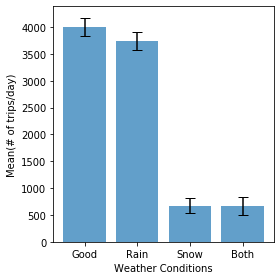

In [171]:
fig, ax = plt.subplots(figsize=(4,4))

ax.bar(x_weather, y_mean_weather, yerr=y_std_weather, align='center', alpha=0.7, ecolor='black', capsize=5)

ax.set_xlabel('Weather Conditions')
ax.set_ylabel('Mean(# of trips/day)')
plt.tight_layout()

In [186]:
x_weather_1 = ['Good','Rain','Bad']

mask_weather_bad = (df_BWH_day_Total['Events'] == 'Snow') | (df_BWH_day_Total['Events'] == 'Both')
Weather_good = df_BWH_day_Total[df_BWH_day_Total['Events'] == 'None'].Total_count_day.copy().mean()
Weather_rain = df_BWH_day_Total[df_BWH_day_Total['Events'] == 'Rain'].Total_count_day.copy().mean()
Weather_bad = df_BWH_day_Total[mask_weather_bad].Total_count_day.copy().mean()

Weather_good_std = df_BWH_day_Total[df_BWH_day_Total['Events'] == 'None'].Total_count_day.copy().sem()
Weather_rain_std = df_BWH_day_Total[df_BWH_day_Total['Events'] == 'Rain'].Total_count_day.copy().sem()
Weather_bad_std = df_BWH_day_Total[mask_weather_bad].Total_count_day.copy().sem()


y_mean_weather_1 = [Weather_good,Weather_rain,Weather_bad]
y_std_weather_1 = [Weather_good_std,Weather_rain_std,Weather_bad_std]



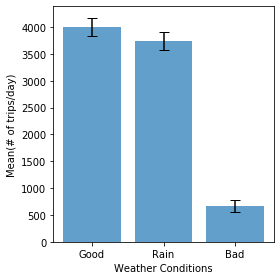

In [187]:
fig, ax = plt.subplots(figsize=(4,4))

ax.bar(x_weather_1, y_mean_weather_1, yerr=y_std_weather_1, align='center', alpha=0.7, ecolor='black', capsize=5)

ax.set_xlabel('Weather Conditions')
ax.set_ylabel('Mean(# of trips/day)')
plt.tight_layout()

## Multi-comparison with Tukey’s test

In [254]:
group1 = df_BWH_day_Total[df_BWH_day_Total['Events'] == 'None'].Total_count_day.copy()
group2 = df_BWH_day_Total[df_BWH_day_Total['Events'] == 'Rain'].Total_count_day.copy()
group3 = df_BWH_day_Total[df_BWH_day_Total['Events'] == 'Snow'].Total_count_day.copy()
group4 = df_BWH_day_Total[df_BWH_day_Total['Events'] == 'Both'].Total_count_day.copy()


F_statistic, pVal = stats.f_oneway(group1, group2, group3,group4)

print ('P value:', pVal)

from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)

MultiComp = MultiComparison(df_BWH_day_Total.Total_count_day,df_BWH_day_Total.Events)

MultiComp.tukeyhsd().summary()

P value: 1.245144511448523e-14


group1,group2,meandiff,p-adj,lower,upper,reject
Both,None,3340.2632,0.001,1843.4666,4837.0599,True
Both,Rain,3075.887,0.001,1555.9236,4595.8504,True
Both,Snow,3.3071,0.9,-1882.4213,1889.0355,False
None,Rain,-264.3762,0.6535,-870.3407,341.5883,False
None,Snow,-3336.9561,0.001,-4606.9465,-2066.9656,True
Rain,Snow,-3072.5799,0.001,-4369.794,-1775.3657,True


## Comparing # of trips for registerd users vs casual users

In [261]:
## Week days

x_Cutom_1 = np.array([1,3])

mask_weekdays =  ((df_BWH_day_CousType['Weekday'] == 5) | (df_BWH_day_CousType['Weekday'] == 6)) | (df_BWH_day_CousType['Holidays'] == 1)
mask_reg = (df_BWH_day_CousType['usertype'] == 'Customer')


Weekdays_Trips_reg_mean = df_BWH_day_CousType[(~mask_weekdays) & ~mask_reg].copy().Total_count_day.mean()
Weekdays_Trips_cas_mean = df_BWH_day_CousType[(~mask_weekdays) & mask_reg].copy().Total_count_day.mean()



Weekdays_Trips_reg_se = df_BWH_day_CousType[(~mask_weekdays) & ~mask_reg].copy().Total_count_day.sem()
Weekdays_Trips_cas_se = df_BWH_day_CousType[(~mask_weekdays) & mask_reg].copy().Total_count_day.sem()



y_mean_customertype_Week = [Weekdays_Trips_reg_mean,Weekdays_Trips_cas_mean]
y_se_customertype_Week = [Weekdays_Trips_reg_se,Weekdays_Trips_cas_se]


In [262]:
## Weekends

Weekends_Trips_reg_mean = df_BWH_day_CousType[(mask_weekdays) & ~mask_reg].copy().Total_count_day.mean()
Weekends_Trips_cas_mean = df_BWH_day_CousType[(mask_weekdays) & mask_reg].copy().Total_count_day.mean()



Weekends_Trips_reg_se = df_BWH_day_CousType[(~mask_weekdays) & ~mask_reg].copy().Total_count_day.sem()
Weekends_Trips_cas_se = df_BWH_day_CousType[(~mask_weekdays) & mask_reg].copy().Total_count_day.sem()



y_mean_customertype_Weekends = [Weekends_Trips_reg,Weekends_Trips_cas]
y_se_customertype_Weekends = [Weekends_Trips_reg_se,Weekends_Trips_cas_se]

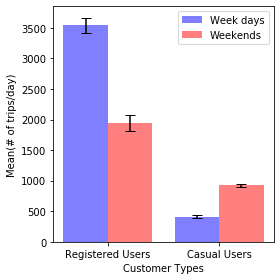

In [263]:
fig, ax = plt.subplots(figsize=(4,4))

ax.bar(x_Cutom_1-0.8 , y_mean_customertype_Week, color='blue',label='Week days', yerr=y_se_customertype_Week, align='center', alpha=0.5, ecolor='black', capsize=5)
ax.bar(x_Cutom_1 , y_mean_customertype_Weekends,color='r', label='Weekends', yerr=y_se_customertype_Weekends, align='center', alpha=0.5, ecolor='black', capsize=5)

ax.set_xticks(x_Cutom_1-0.4)
ax.set_xticklabels( ('Registered Users', 'Casual Users') )
ax.set_xlabel('Customer Types')
ax.set_ylabel('Mean(# of trips/day)')
ax.legend()
plt.tight_layout()

### Test whether # of trips of registered users are higher than casual users during week days  by 10% of the all trips

In [284]:
Weekdays_Trips_reg = df_BWH_day_CousType[(~mask_weekdays) & ~mask_reg].copy().Total_count_day
Weekdays_Trips_cas = df_BWH_day_CousType[(~mask_weekdays) & mask_reg].copy().Total_count_day 
Total_trips_mean_10percent = (df_BWH_day_Total.Total_count_day.mean())*0.1
Weekdays_Trips_cas_10percent = Weekdays_Trips_cas + Total_trips_mean_10percent

In [281]:
# Using stats.ttest_ind

stat, p_val = stats.ttest_ind(Weekdays_Trips_reg, Weekdays_Trips_cas_10percent, equal_var=False)

print(f'The statistic is: {stat} \nP-value: {p_val/2}')

The statistic is: 21.170002790838463 
P-value: 4.008387991429124e-59


In [304]:
Weekends_Trips_reg = df_BWH_day_CousType[(mask_weekdays) & ~mask_reg].copy().Total_count_day
Weekends_Trips_cas = df_BWH_day_CousType[(mask_weekdays) & mask_reg].copy().Total_count_day

Total_trips_mean_10percent = (df_BWH_day_Total.Total_count_day.mean())*0.1
Weekends_Trips_cas_10percent = Weekends_Trips_cas + Total_trips_mean_10percent


In [305]:
stat, p_val = stats.ttest_ind(Weekends_Trips_reg, Weekends_Trips_cas_10percent, equal_var=False)

print(f'The statistic is: {stat} \nP-value: {p_val}')

The statistic is: 4.70071470778217 
P-value: 4.7251784513521175e-06


## Investigating the gender effects on # of trips

In [328]:
df_BWH_day_Gender
mask_males = (df_BWH_day_Gender['gender'] == 1)
mask_females = (df_BWH_day_Gender['gender'] == 2)
mask_register = (df_BWH_day_Gender['usertype'] == 'Subscriber')

Trips_males_mean = df_BWH_day_Gender[(mask_males) & mask_register].copy().Total_count_day.mean()
Trips_females_mean = df_BWH_day_Gender[(mask_females) & mask_register].copy().Total_count_day.mean()

Trips_males_se = df_BWH_day_Gender[(mask_males) & mask_register].copy().Total_count_day.sem()
Trips_females_se = df_BWH_day_Gender[(mask_females) & mask_register].copy().Total_count_day.sem()


y_mean_gender = [Trips_males_mean,Trips_females_mean]
y_se_gender = [Trips_males_se,Trips_females_se]



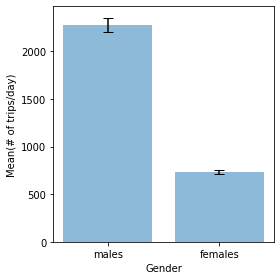

In [329]:
x_gender = ['males','females']

fig, ax = plt.subplots(figsize=(4,4))

ax.bar(x_gender , y_mean_gender, yerr=y_se_gender, align='center', alpha=0.5, ecolor='black', capsize=5)

ax.set_xlabel('Gender')
ax.set_ylabel('Mean(# of trips/day)')
plt.tight_layout()

### Statistical testing

In [335]:
Trips_males = df_BWH_day_Gender[(mask_males) & mask_register].copy().Total_count_day
Trips_females = df_BWH_day_Gender[(mask_females) & mask_register].copy().Total_count_day
Total_trips_mean_10percent = (df_BWH_day_Gender.Total_count_day.mean())*.1
Trips_females_10percent = Trips_females + Total_trips_mean_10percent


In [336]:
stat, p_val = stats.ttest_ind(Trips_males, Trips_females_10percent, equal_var=False)

print(f'The statistic is: {stat} \nP-value: {p_val}')

The statistic is: 18.01847477856682 
P-value: 6.845960804989794e-55


## Explore the effects of age on # of trips/day

In [ ]:
mask_register1 = (df_B_W_H['usertype'] == 'Subscriber')
df_age = df_B_W_H[mask_register1].copy()
df_age

# ctr_signed_in['age_groups'] = pd.cut(ctr_signed_in.Age, 
#                                      [7, 18, 24, 34, 44, 54, 64, 1000], 
#                                      include_lowest=True)

## Create tables for hourly usages

In [ ]:
df_BWH_hour_Total = df_B_W_H.groupby(['Year', 'Month','Day','Weekday','hour','Avg Temp (F)','Avg Humidity (%)','Avg Visibility (mi)','Avg Wind (mph)','Events','Holidays','season']).agg(Total_count_hour=('starttime', 'count'))

In [42]:
df_BWH_hour_Total.head(5)

Total_count_hour
Year Month Day Weekday hour Avg Temp (F) Avg Humidity (%) Avg Visibility (mi) Avg Wind (mph) Events Holidays season                  
2017 1     1   6       0    40           64               10                  15             Rain   1        1.0                   13
                       1    40           64               10                  15             Rain   1        1.0                    7
                       2    40           64               10                  15             Rain   1        1.0                    4
                       3    40           64               10                  15             Rain   1        1.0                    2
                       4    40           64               10                  15             Rain   1        1.0                    6